In [32]:
import pandas as pd
import numpy as np 

pd.set_option('display.max_rows', 500)

![CRISP_DM](CRISP_DM.png)

# Data Preparation

* Focus is to understand the final data structure
* support each steps by visual analytics

# Johns Hopkins GITHUB csv data



In [17]:
%cd data/

[Errno 2] No such file or directory: 'data/'
/Users/SHS/Desktop/EDS_SS2022_Salim/ads_covid-19/data


In [18]:
data_path='../data/raw/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
pd_raw=pd.read_csv(data_path)


In [20]:
pd_raw.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/11/22,5/12/22,5/13/22,5/14/22,5/15/22,5/16/22,5/17/22,5/18/22,5/19/22,5/20/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,179131,179169,179203,179242,179267,179321,179328,179477,179597,179624
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,275440,275485,275534,275574,275615,275621,275688,275732,275732,275732
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,265806,265808,265814,265816,265818,265823,265828,265834,265841,265847
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,41717,42156,42156,42156,42156,42156,42156,42572,42572,42572
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,99287,99287,99287,99287,99287,99287,99287,99287,99287,99287


In [22]:
time_idx=pd_raw.columns[4:]

In [24]:
df_plot = pd.DataFrame({
    'date':time_idx})
df_plot.head()

,date
0,1/22/20
1,1/23/20
2,1/24/20
3,1/25/20
4,1/26/20


In [25]:
pd_raw['Country/Region']

0                           Afghanistan
1                               Albania
2                               Algeria
3                               Andorra
4                                Angola
5                            Antarctica
6                   Antigua and Barbuda
7                             Argentina
8                               Armenia
9                             Australia
10                            Australia
11                            Australia
12                            Australia
13                            Australia
14                            Australia
15                            Australia
16                            Australia
17                              Austria
18                           Azerbaijan
19                              Bahamas
20                              Bahrain
21                           Bangladesh
22                             Barbados
23                              Belarus
24                              Belgium


In [26]:
pd_raw[pd_raw['Country/Region']=='Germany'].iloc[:,4::].sum(axis=0)[0:4]

1/22/20    0
1/23/20    0
1/24/20    0
1/25/20    0
dtype: int64

In [34]:
country_list=['Italy',
              'US',
              'Spain',
              'Germany',
              'Korea, South',
             ] 

In [35]:
for each in country_list:
    df_plot[each]=np.array(pd_raw[pd_raw['Country/Region']==each].iloc[:,4::].sum(axis=0))

In [36]:
df_plot

,date,Italy,US,Spain,Germany,"Korea, South"
0,1/22/20,0,1,0,0,1
1,1/23/20,0,1,0,0,1
2,1/24/20,0,2,0,0,2
3,1/25/20,0,2,0,0,2
4,1/26/20,0,5,0,0,3
...,...,...,...,...,...,...
845,5/16/22,17071649,82630509,12127122,25818405,17830429
846,5/17/22,17116550,82742996,12179234,25890456,17861744
847,5/18/22,17147477,82951379,12179234,25949175,17889849
848,5/19/22,17178199,83060959,12179234,25998085,17914957


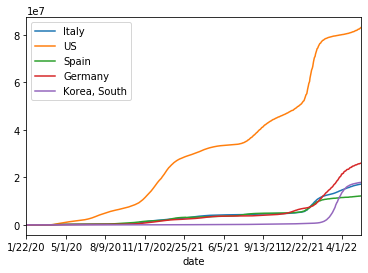

In [37]:
%matplotlib inline
df_plot.set_index('date').plot()

End of initial data preparation

====================